## News-based Shock to Inflation 

- The codes in this notebook construct topic-specific shock to inflation based on news articles. 
- News media: New York Times. (Wall Streat Journal for future) 
- Currently, the sample period is 2009-2019, and there are,in total, 4670 articles.

In [1]:
import numpy as np
import pandas as pd
import nltk  
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Data Pre-processing

In [2]:
test_txt = open('../TextData/InfNYT1.txt').read()

In [3]:
raw_txt =''
for txt_id in range(1):
    myfile = ('../TextData/InfNYT'+str(txt_id+1)+'.txt')
    print(myfile)
    txt_temp = open(myfile).read()
    print('lenght of the txt is '+ str(len(txt_temp)))
    raw_txt += txt_temp
print('Total length of the text is '+str(len(raw_txt)))

../TextData/InfNYT1.txt
lenght of the txt is 4655162
Total length of the text is 4655162


In [4]:
## split raw texts into articles 
divider = '\n____________________________________________________________\n'
articles = raw_txt.split(divider)

In [5]:
articles[2]

'\nTrump Picks Fed Veteran And Fed Critic for Board\n\nAuthor: Smialek, Jeanna\n\nPublication info: New York Times , Late Edition (East Coast); New York, N.Y. [New York, N.Y]03 July 2019: B.3.\n\nhttps://search.proquest.com/docview/2250900451?accountid=11752\n\nAbstract: None available.\n\nLinks: http://findit.library.jhu.edu/resolve?url_ver=Z39.88-2004&amp;rft_val_fmt=info:ofi/fmt:kev:mtx:journal&amp;genre=article&amp;sid=ProQ:ProQ%3Anytimes&amp;atitle=Trump+Picks+Fed+Veteran+And+Fed+Critic+for+Board%3A+%5BBusiness%2FFinancial+Desk%5D&amp;title=New+York+Times&amp;issn=03624331&amp;date=2019-07-03&amp;volume=&amp;issue=&amp;spage=B.3&amp;au=Smialek%2C+Jeanna&amp;isbn=&amp;jtitle=New+York+Times&amp;btitle=&amp;rft_id=info:eric/&amp;rft_id=info:doi/\n\nFull text: WASHINGTON -- President Trump, who has spent months assailing the Federal Reserve for its interest rate policies, said he planned to nominate Christopher Waller, a longtime regional Fed official, and Judy Shelton, a Fed critic, 

In [6]:
len(articles)

501

In [31]:
## create empty dataframe to store articles information
index = np.arange(len(articles))
columns = ['author',
          'text',
          'subject',
          'location',
          'company',
          'people',
           'organization',
          'title',
          'doctype',
           'date']

dt = pd.DataFrame(index=index,columns = columns)

dt['author'][1]

nan

In [37]:
## new codes that extract information about each article
author_str0 = '\nAuthor:'
author_str1 = '\nPublication info:'
author_str = [author_str0,author_str1]

text_str0 = '\nFull text:'
text_str1 = '\nSubject:'
text_str =[text_str0,text_str1]

subject_str0 = '\nSubject:'
subject_str1 = '\nLocation:'
subject_str = [subject_str0,subject_str1]

location_str0 = '\nLocation:'
location_str1 ='\nCompany / organization:'
location_str = [location_str0,location_str1]

organ_str0 = '\nCompany / organization:'
organ_str1 = '\nURL:'
organ_str = [organ_str0,organ_str1]

people_str0 = '\nPeople:'
people_str1 = '\nCompany / organization:'
people_str = [people_str0,people_str1]

title_str0 = '\nTitle:'
title_str1 = ': \xa0'
title_str = [title_str0,title_str1]

doc_type_str0 = '\nDocument type:'
doc_type_str1 = '\nProQuest document ID:'
doc_type_str = [doc_type_str0,doc_type_str1]

date_str0 = '\nLast updated:'
date_str1 ='\nDatabase:'
date_str = [date_str0,date_str1]

str_list = {'author':author_str,
           'text':text_str,
           'subject':subject_str,
           'location':location_str,
            'organization':organ_str,
           'people':people_str,
           'title':title_str,
           'doctype':doc_type_str,
           'date':date_str}

# first, check if all articles contain these strings. 

#for article in articles:
#    for string in str_list:
#        i = 0
#        if string[0] not in article:
#            i+=1
#        if i >0:
#            print("There is "+str(i)+ ' article, for which there is no such a string' )


# second, locate them 

for i,article in enumerate(articles[:3]):
    for info,string in str_list.items():
        if string[0] in article and string[1] in article:
            loc_str = article.find(string[0])
            loc_str1= article.find(string[1])
            #print(string)
            #print(str(loc_str) + ' is where the string starts')
            extract = article[loc_str:loc_str1].split(string[0])[1]
            #pd[info][i] = extract  

In [8]:
## extract information about articles 


## locators 
start_where = '___\n'
title_where = '\nAuthor:'
author_where = '\nPublication'
text_where ='\nFull text:'
subject_where ='\nSubject:'
location_where = '\nLocation:'
people_where = '\nPeople:'

# document_type_where


author_lst = []
title_lst = []

for article in articles[3:6]:
    # full text 
    text = article.split(text_where)[1].split(subject_where)[0]
    # location 
    location =article.split(location_where)[1].split(people_where)[0]
    
    if title_where in article:
        ## info about the article
        if len(article.split(author_where))>=2: 
            if len(article.split(author_where)[0].split(title_where)) >=2:
                author = article.split(author_where)[0].split(title_where)[1]
            else:
                author=''
                title=''
            if len(article.split(title_where)[0])>=2:
                title = article.split(title_where)[0]
            else:
                title=''
    else:
        author = ''
        title=article.split(author_where)[0]
    
    title = title[title.find('_\n')+2:]  # regular expression

    author_lst.append(author)
    title_lst.append(title)

    ## print
    #print('author:'+ author)
    #print('title:'+ title)
    #print('full text:'+text)
    print('location:'+location)

location: United States--US

location: Iran United States--US

location: United States--US Denmark Canada Palo Alto California

Company / organization: Name: Canada Pension Plan Investment Board; NAICS: 923130; Name: Environmental Protection Agency--EPA; NAICS: 924110

Title: The Digest:   [Business/Financial Desk ]

Publication title: New York Times, Late Edition (East Coast); New York, N.Y.

Pages: B.2

Publication year: 2019

Publication date: Jun 29, 2019

Section: B

Publisher: New York Times Company

Place of publication: New York, N.Y.

Country of publication: United States, New York, N.Y.

Publication subject: General Interest Periodicals--United States

ISSN: 03624331

Source type: Newspapers

Language of publication: English

Document type: News

ProQuest document ID: 2248848807

Document URL: https://search.proquest.com/docview/2248848807?accountid=11752

Copyright: Copyright New York Times Company Jun 29, 2019

Last updated: 2019-06-29

Database: ProQuest Central



In [9]:
# tokenize the raw texts
tokenizer = nltk.RegexpTokenizer(r'\w+')  # ignore putuations 
toks = tokenizer.tokenize(raw_txt)
# convert to lower case
toks = [w.lower() for w in toks]

## clean tokens

### remove stop words
stop_words = set(stopwords.words('english'))
toks = [w for w in toks if not w in stop_words]
toks.sort()

### lemmatizing

lemmatizer = WordNetLemmatizer()
toks = [lemmatizer.lemmatize(w) for w in toks]

### exclude numbers

#toks = [w for w in toks if not r'[0-9]*']

### exclude news paper information

source_inf = ['publication','proquest','copyright']
toks = [w for w in toks if not w in source_inf]

In [10]:
# count frequency 
freq = nltk.FreqDist(toks)
print('Number of unique tokens is '+str(len(freq)))

Number of unique tokens is 22479


In [11]:
list(freq.most_common(100))

[('amp', 8003),
 ('new', 7089),
 ('york', 6193),
 ('time', 4407),
 ('mr', 4089),
 ('said', 3731),
 ('state', 3390),
 ('year', 3340),
 ('percent', 2959),
 ('united', 2933),
 ('company', 2697),
 ('n', 2556),
 ('rate', 2454),
 ('trump', 2328),
 ('2018', 2155),
 ('economy', 2039),
 ('info', 2001),
 ('economic', 1981),
 ('http', 1899),
 ('market', 1877),
 ('would', 1843),
 ('fed', 1789),
 ('interest', 1674),
 ('2019', 1638),
 ('1', 1580),
 ('last', 1572),
 ('document', 1528),
 ('title', 1510),
 ('country', 1499),
 ('president', 1488),
 ('com', 1479),
 ('name', 1445),
 ('growth', 1418),
 ('people', 1380),
 ('naics', 1377),
 ('american', 1366),
 ('china', 1327),
 ('price', 1307),
 ('trade', 1299),
 ('one', 1251),
 ('inflation', 1234),
 ('2', 1221),
 ('stock', 1217),
 ('could', 1206),
 ('late', 1180),
 ('bank', 1177),
 ('u', 1174),
 ('central', 1156),
 ('government', 1131),
 ('business', 1119),
 ('tax', 1093),
 ('east', 1082),
 ('policy', 1066),
 ('subject', 1051),
 ('type', 1044),
 ('search',

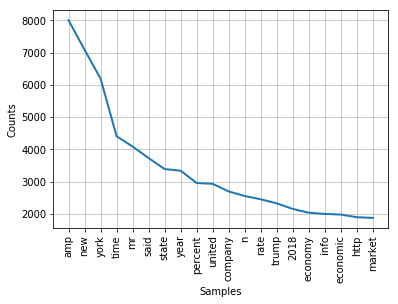

In [12]:
plt = freq.plot(20)

In [13]:
## ngrams 
toks.sort()
#bigram = list(nltk.bigrams(toks))
#bigram[-100:-1]

In [14]:
# tokenize each articles